In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout

#### datasets import

In [55]:
!kaggle competitions download -c digit-recognizer

In [56]:
!dir

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг Acer
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 0A91-591B

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\qu4n7\Desktop\neural_network\_2

25.06.2019  17:50    <DIR>          .
25.06.2019  17:50    <DIR>          ..
24.06.2019  17:23    <DIR>          .ipynb_checkpoints
12.06.2019  12:10            20я899 0_neural_course_02_kaggle_mnist.ipynb
12.06.2019  10:07            69я644 0_neural_course_02_overfitting.ipynb
24.06.2019  22:33           374я492 neural_course_02_kaggle_mnist.ipynb
25.06.2019  17:50           223я784 neural_course_02_kaggle_mnist.light.¤§.ipynb
12.06.2019  12:10            34я277 neural_course_02_overfitting.ipynb
15.06.2019  21:29            24я045 pima-indians-diabetes.csv
13.06.2019  10:57           240я909 sample_submission.csv
24.06.2019  22:51           240я909 submission.csv
13.06.2019  10:57        51я118я296 test.csv
13.06.2019  10:57        76я775я041 train.csv
              10 д ©«®ў    129я122я296 Ў ©в
               3 Ї Ї®Є  71я576я403я968 Ў ©в бў®Ў®¤­®


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [58]:
print(df_train.shape)
df_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print(df_test.shape)
df_test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


#### training data preparation

In [3]:
train_dataset = df_train.values
train_dataset

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
x_train = train_dataset[:,1:]

In [5]:
# normalizing data <= neural networks works much better if training set is within [0,1]
x_train = x_train / 255

In [6]:
y_train = train_dataset[:, 0]

In [7]:
y_train = utils.to_categorical(y_train)

#### creating the draft model

In [66]:
model = Sequential()

In [67]:
x_train.shape

(42000, 784)

In [68]:
# input subsequent layer, 800 neurons, 784 inputs for the each neuron 
model.add(Dense(800, input_dim=784, activation='relu'))
# output subsequent layer, 10 neurons
model.add(Dense(10, activation='softmax'))

In [69]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# using categorical_crossentropy since the function is differentiable, this is must for the  
# gradient descent algorithms 'adam'
# genetic algorithms allow others 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
history = model.fit(x_train, y_train, batch_size=200, epochs=30, validation_split=0.2, verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 80us/sample - loss: 0.3527 - acc: 0.9000 - val_loss: 0.1849 - val_acc: 0.9492
Epoch 2/30
33600/33600 [==============================] - 2s 68us/sample - loss: 0.1463 - acc: 0.9589 - val_loss: 0.1333 - val_acc: 0.9602
Epoch 3/30
33600/33600 [==============================] - 2s 68us/sample - loss: 0.0986 - acc: 0.9714 - val_loss: 0.1085 - val_acc: 0.9664
Epoch 4/30
33600/33600 [==============================] - 2s 68us/sample - loss: 0.0700 - acc: 0.9805 - val_loss: 0.1020 - val_acc: 0.9676
Epoch 5/30
33600/33600 [==============================] - 2s 68us/sample - loss: 0.0506 - acc: 0.9868 - val_loss: 0.0887 - val_acc: 0.9715
Epoch 6/30
33600/33600 [==============================] - 2s 69us/sample - loss: 0.0367 - acc: 0.9907 - val_loss: 0.0866 - val_acc: 0.9731
Epoch 7/30
33600/33600 [==============================] - 2s 67us/sample - loss: 0.0271 - acc: 0.9937 - val_loss: 0.0

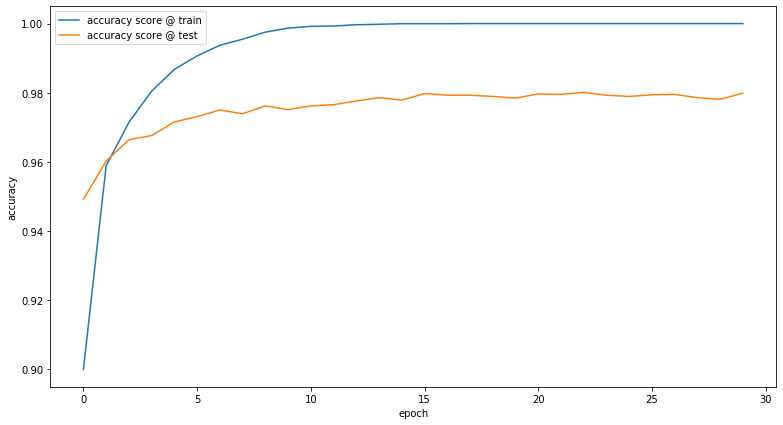

In [71]:
plt.figure(figsize=(13,7))
plt.plot(history.history['acc'], label='accuracy score @ train')
plt.plot(history.history['val_acc'], label='accuracy score @ test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### test data preparation

In [12]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [13]:
x_test = test_dataset / 255

#### prediction

In [74]:
predictions = model.predict(x_test)

In [75]:
predictions[:5]

array([[2.12824804e-14, 2.14217348e-24, 1.00000000e+00, 8.74618185e-15,
        1.76769328e-15, 5.23601547e-20, 4.49144250e-16, 6.79694601e-15,
        3.40620027e-15, 3.44684590e-18],
       [1.00000000e+00, 1.73026334e-14, 2.21476982e-12, 1.68980639e-12,
        5.54314243e-17, 1.17253873e-09, 1.15447517e-12, 9.24201774e-12,
        4.14670570e-14, 3.28316683e-15],
       [7.43317699e-11, 2.87885964e-08, 4.52193717e-07, 4.95905479e-05,
        2.37982531e-05, 4.44369959e-07, 2.06401368e-10, 1.62472804e-06,
        1.89668190e-05, 9.99905109e-01],
       [1.17859235e-02, 2.36972508e-11, 2.36787644e-04, 9.45464251e-07,
        9.62878403e-04, 9.37602973e-09, 1.84859755e-06, 1.43875991e-06,
        8.61031921e-08, 9.87010121e-01],
       [1.31872443e-12, 4.82906548e-10, 4.58857085e-06, 9.99991059e-01,
        9.23302205e-19, 1.93877966e-07, 9.24852534e-13, 3.18541444e-13,
        4.11526344e-06, 5.51255708e-10]], dtype=float32)

In [76]:
predictions = np.argmax(predictions, axis=1)

In [77]:
predictions[:5]

array([2, 0, 9, 9, 3], dtype=int64)

#### kaggle submit

In [78]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [79]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 9],
       [5, 3]], dtype=int64)

In [80]:
np.savetxt('submission.csv', out, header='ImageId,Label', comments='', fmt='%d,%d')

In [81]:
df_out = pd.read_csv('submission.csv')
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [82]:
!kaggle competitions submit -c digit-recognizer -m "submission_190613" -f submission.csv

## grid search for the network hyperparameters

#### tuning batch size and the number of epochs

In [83]:
# introducing function for creating a model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(800, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [84]:
model = KerasClassifier(build_fn=create_model, validation_split=0.2, verbose=1)

In [85]:
batch_size = [30, 40, 50, 70]
epochs = [10, 50, 80]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [86]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)

In [88]:
grid_result_s_e = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 9s 255us/sample - loss: 0.2366 - acc: 0.9293 - val_loss: 0.1161 - val_acc: 0.9658
Epoch 2/80
33600/33600 [==============================] - 8s 242us/sample - loss: 0.0933 - acc: 0.9723 - val_loss: 0.1035 - val_acc: 0.9671
Epoch 3/80
33600/33600 [==============================] - 8s 242us/sample - loss: 0.0585 - acc: 0.9820 - val_loss: 0.1001 - val_acc: 0.9694
Epoch 4/80
33600/33600 [==============================] - 8s 243us/sample - loss: 0.0399 - acc: 0.9870 - val_loss: 0.0927 - val_acc: 0.9720
Epoch 5/80
33600/33600 [==============================] - 8s 245us/sample - loss: 0.0284 - acc: 0.9905 - val_loss: 0.0890 - val_acc: 0.9771
Epoch 6/80
33600/33600 [==============================] - 8s 242us/sample - loss: 0.0223 - acc: 0.9925 - val_loss: 0.0958 - val_acc: 0.9744
Epoch 7/80
33600/33600 [==============================] - 8s 242us/sample - loss: 0.0170 - acc: 0.9947 - val_lo

Epoch 59/80
33600/33600 [==============================] - 8s 237us/sample - loss: 0.0034 - acc: 0.9992 - val_loss: 0.2157 - val_acc: 0.9771
Epoch 60/80
33600/33600 [==============================] - 8s 236us/sample - loss: 0.0044 - acc: 0.9990 - val_loss: 0.2317 - val_acc: 0.9744
Epoch 61/80
33600/33600 [==============================] - 8s 235us/sample - loss: 0.0034 - acc: 0.9991 - val_loss: 0.2395 - val_acc: 0.9746
Epoch 62/80
33600/33600 [==============================] - 8s 232us/sample - loss: 0.0036 - acc: 0.9992 - val_loss: 0.1994 - val_acc: 0.9786
Epoch 63/80
33600/33600 [==============================] - 8s 244us/sample - loss: 0.0053 - acc: 0.9986 - val_loss: 0.2178 - val_acc: 0.9760
Epoch 64/80
33600/33600 [==============================] - 8s 250us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.1965 - val_acc: 0.9786
Epoch 65/80
33600/33600 [==============================] - 9s 266us/sample - loss: 0.0051 - acc: 0.9991 - val_loss: 0.1916 - val_acc: 0.9799
Epoch 66/80
3

In [89]:
print(f'best score {grid_result_s_e.best_score_}\nbest parameters {grid_result_s_e.best_params_}')
means_s_e = grid_result_s_e.cv_results_['mean_test_score']
stds_s_e = grid_result_s_e.cv_results_['std_test_score']
params_s_e = grid_result_s_e.cv_results_['params']
for mean, std, param in zip(means_s_e, stds_s_e, params_s_e):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9778095086415609
best parameters {'batch_size': 30, 'epochs': 80}
mean:0.9714523951212565, std:0.001047064882480838, param: {'batch_size': 30, 'epochs': 10}
mean:0.9741904934247335, std:0.0026817188858574066, param: {'batch_size': 30, 'epochs': 50}
mean:0.9778095086415609, std:0.0004529946894320892, param: {'batch_size': 30, 'epochs': 80}
mean:0.9702619115511576, std:0.0017538499560145132, param: {'batch_size': 40, 'epochs': 10}
mean:0.9776904781659445, std:0.00029355217693673895, param: {'batch_size': 40, 'epochs': 50}
mean:0.9770238002141317, std:0.00044159213472880725, param: {'batch_size': 40, 'epochs': 80}
mean:0.9676904678344727, std:0.003969830527567706, param: {'batch_size': 50, 'epochs': 10}
mean:0.9766904711723328, std:0.0019746064654945854, param: {'batch_size': 50, 'epochs': 50}
mean:0.9777142802874247, std:0.0009165892819860083, param: {'batch_size': 50, 'epochs': 80}
mean:0.9753571550051371, std:0.0007846369479592251, param: {'batch_size': 70, 'epochs': 10}
m

batch_size : 30

epochs : 80

best score : 0.9778095086415609

loss: 0.0047 - acc: 0.9994 - val_loss: 0.2087 - val_acc: 0.9800

####  tuning optimizer

In [90]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(800, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_a = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 9s 267us/sample - loss: 0.2391 - acc: 0.9290 - val_loss: 0.1375 - val_acc: 0.9585
Epoch 2/80
33600/33600 [==============================] - 8s 253us/sample - loss: 0.0955 - acc: 0.9709 - val_loss: 0.1128 - val_acc: 0.9652
Epoch 3/80
33600/33600 [==============================] - 9s 254us/sample - loss: 0.0581 - acc: 0.9822 - val_loss: 0.0937 - val_acc: 0.9705
Epoch 4/80
33600/33600 [==============================] - 9s 253us/sample - loss: 0.0382 - acc: 0.9877 - val_loss: 0.0891 - val_acc: 0.9739
Epoch 5/80
33600/33600 [==============================] - 8s 253us/sample - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0908 - val_acc: 0.9748
Epoch 6/80
33600/33600 [==============================] - 9s 254us/sample - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0970 - val_acc: 0.9736
Epoch 7/80
33600/33600 [==============================] - 8s 253us/sample - loss: 0.0186 - acc: 0.9935 - val_lo

In [91]:
print(f'best score {grid_result_a.best_score_}\nbest parameters {grid_result_a.best_params_}')
means_a = grid_result_a.cv_results_['mean_test_score']
stds_a = grid_result_a.cv_results_['std_test_score']
params_a = grid_result_a.cv_results_['params']
for mean, std, param in zip(means_a, stds_a, params_a):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9780714313189188
best parameters {'optimizer': 'Adadelta'}
mean:0.9776190519332886, std:0.0015868638381951329, param: {'optimizer': 'SGD'}
mean:0.9768333236376444, std:0.0016916587929197134, param: {'optimizer': 'RMSprop'}
mean:0.9775476257006327, std:0.0005841957777721462, param: {'optimizer': 'Adagrad'}
mean:0.9780714313189188, std:0.0003499399822886081, param: {'optimizer': 'Adadelta'}
mean:0.9771190484364828, std:0.0017518910101985896, param: {'optimizer': 'Adam'}
mean:0.9776190519332886, std:0.000587101129894498, param: {'optimizer': 'Adamax'}
mean:0.9763571619987488, std:0.002838037070625585, param: {'optimizer': 'Nadam'}


optimizer : Adadelta

best score : 0.0.9780714313189188

loss: 1.1928e-07 - acc: 1.0000 - val_loss: 0.1639 - val_acc: 0.9826

####  tuning network weight initialization

In [93]:
def create_model(init_mode='softmax'):
	model = Sequential()
	model.add(Dense(800, input_dim=784, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_w = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 10s 290us/sample - loss: 0.2612 - acc: 0.9206 - val_loss: 0.1335 - val_acc: 0.9610
Epoch 2/80
33600/33600 [==============================] - 9s 276us/sample - loss: 0.1054 - acc: 0.9699 - val_loss: 0.1010 - val_acc: 0.9674
Epoch 3/80
33600/33600 [==============================] - 9s 280us/sample - loss: 0.0677 - acc: 0.9797 - val_loss: 0.0918 - val_acc: 0.9725
Epoch 4/80
33600/33600 [==============================] - 9s 274us/sample - loss: 0.0488 - acc: 0.9861 - val_loss: 0.0763 - val_acc: 0.9765
Epoch 5/80
33600/33600 [==============================] - 9s 278us/sample - loss: 0.0340 - acc: 0.9907 - val_loss: 0.0850 - val_acc: 0.9745
Epoch 6/80
33600/33600 [==============================] - 9s 278us/sample - loss: 0.0239 - acc: 0.9936 - val_loss: 0.0781 - val_acc: 0.9764
Epoch 7/80
33600/33600 [==============================] - 9s 277us/sample - loss: 0.0174 - acc: 0.9960 - val_l

In [94]:
print(f'best score {grid_result_w.best_score_}\nbest parameters {grid_result_w.best_params_}')
means_w = grid_result_w.cv_results_['mean_test_score']
stds_w = grid_result_w.cv_results_['std_test_score']
params_w = grid_result_w.cv_results_['params']
for mean, std, param in zip(means_w, stds_w, params_w):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9764761924743652
best parameters {'init_mode': 'normal'}
mean:0.9759761889775594, std:0.0003515336903624437, param: {'init_mode': 'uniform'}
mean:0.9751428564389547, std:0.0012710819245906654, param: {'init_mode': 'lecun_uniform'}
mean:0.9764761924743652, std:0.0007055121917699546, param: {'init_mode': 'normal'}
mean:0.11152380704879761, std:0.0014827040168806835, param: {'init_mode': 'zero'}
mean:0.9760000109672546, std:0.0007715344084274748, param: {'init_mode': 'glorot_normal'}
mean:0.9760476152102152, std:0.0005753719756120067, param: {'init_mode': 'glorot_uniform'}
mean:0.9754523634910583, std:0.0006734223455070648, param: {'init_mode': 'he_normal'}
mean:0.9757619102795919, std:0.0008908911967893226, param: {'init_mode': 'he_uniform'}


In [95]:
def create_model(init_mode='softmax'):
	model = Sequential()
	model.add(Dense(800, input_dim=784, kernel_initializer='normal', activation='relu'))
	model.add(Dense(10,  kernel_initializer=init_mode, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_w = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 10s 303us/sample - loss: 0.2560 - acc: 0.9240 - val_loss: 0.1273 - val_acc: 0.9620
Epoch 2/80
33600/33600 [==============================] - 10s 284us/sample - loss: 0.1050 - acc: 0.9694 - val_loss: 0.0997 - val_acc: 0.9682
Epoch 3/80
33600/33600 [==============================] - 10s 284us/sample - loss: 0.0674 - acc: 0.9797 - val_loss: 0.0973 - val_acc: 0.9725
Epoch 4/80
33600/33600 [==============================] - 10s 284us/sample - loss: 0.0484 - acc: 0.9859 - val_loss: 0.0805 - val_acc: 0.9754
Epoch 5/80
33600/33600 [==============================] - 10s 283us/sample - loss: 0.0342 - acc: 0.9904 - val_loss: 0.0847 - val_acc: 0.9749
Epoch 6/80
33600/33600 [==============================] - 9s 280us/sample - loss: 0.0237 - acc: 0.9941 - val_loss: 0.0772 - val_acc: 0.9768
Epoch 7/80
33600/33600 [==============================] - 10s 284us/sample - loss: 0.0170 - acc: 0.9958 - 

In [97]:
print(f'best score {grid_result_w.best_score_}\nbest parameters {grid_result_w.best_params_}')
means_w = grid_result_w.cv_results_['mean_test_score']
stds_w = grid_result_w.cv_results_['std_test_score']
params_w = grid_result_w.cv_results_['params']
for mean, std, param in zip(means_w, stds_w, params_w):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9764285882314047
best parameters {'init_mode': 'he_uniform'}
mean:0.976285715897878, std:0.001011844145464149, param: {'init_mode': 'uniform'}
mean:0.9755476117134094, std:0.0007961046147928391, param: {'init_mode': 'lecun_uniform'}
mean:0.9756666620572408, std:0.000729194604394213, param: {'init_mode': 'normal'}
mean:0.9756666620572408, std:0.00043774257211227983, param: {'init_mode': 'zero'}
mean:0.9755476117134094, std:0.0011132192016632522, param: {'init_mode': 'glorot_normal'}
mean:0.9758333365122477, std:0.0007198188257217453, param: {'init_mode': 'glorot_uniform'}
mean:0.975523829460144, std:0.0008438173080030853, param: {'init_mode': 'he_normal'}
mean:0.9764285882314047, std:0.0006725861597694601, param: {'init_mode': 'he_uniform'}


'init_mode': 'he_uniform'

best score : 0.9764285882314047

loss: 3.9176e-05 - acc: 1.0000 - val_loss: 0.1029 - val_acc: 0.9812

In [98]:
def create_model(init_mode='softmax'):
	model = Sequential()
	model.add(Dense(800, input_dim=784, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(10, kernel_initializer=init_mode, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_w = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 11s 316us/sample - loss: 0.2563 - acc: 0.9231 - val_loss: 0.1467 - val_acc: 0.9538
Epoch 2/80
33600/33600 [==============================] - 10s 300us/sample - loss: 0.1063 - acc: 0.9689 - val_loss: 0.1028 - val_acc: 0.9671
Epoch 3/80
33600/33600 [==============================] - 10s 299us/sample - loss: 0.0706 - acc: 0.9789 - val_loss: 0.0841 - val_acc: 0.9735
Epoch 4/80
33600/33600 [==============================] - 10s 304us/sample - loss: 0.0501 - acc: 0.9853 - val_loss: 0.0774 - val_acc: 0.9767
Epoch 5/80
33600/33600 [==============================] - 10s 303us/sample - loss: 0.0356 - acc: 0.9901 - val_loss: 0.0764 - val_acc: 0.9757
Epoch 6/80
33600/33600 [==============================] - 10s 301us/sample - loss: 0.0254 - acc: 0.9933 - val_loss: 0.0786 - val_acc: 0.9770
Epoch 7/80
33600/33600 [==============================] - 10s 300us/sample - loss: 0.0184 - acc: 0.9952 -

In [99]:
print(f'best score {grid_result_w.best_score_}\nbest parameters {grid_result_w.best_params_}')
means_w = grid_result_w.cv_results_['mean_test_score']
stds_w = grid_result_w.cv_results_['std_test_score']
params_w = grid_result_w.cv_results_['params']
for mean, std, param in zip(means_w, stds_w, params_w):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9762619137763977
best parameters {'init_mode': 'glorot_uniform'}
mean:0.9753095308939616, std:0.0011313911992116208, param: {'init_mode': 'uniform'}
mean:0.9757142861684164, std:0.0009636411599861402, param: {'init_mode': 'lecun_uniform'}
mean:0.9759047428766886, std:0.0006126079625017645, param: {'init_mode': 'normal'}
mean:0.11152380704879761, std:0.0014827040168806835, param: {'init_mode': 'zero'}
mean:0.9759523868560791, std:0.00037038650471373673, param: {'init_mode': 'glorot_normal'}
mean:0.9762619137763977, std:0.0011403847909756811, param: {'init_mode': 'glorot_uniform'}
mean:0.975428581237793, std:0.0007445865394734488, param: {'init_mode': 'he_normal'}
mean:0.9751190344492594, std:0.001476944984133996, param: {'init_mode': 'he_uniform'}


#### tuning the neuron activation function

In [101]:
def create_model(activation='relu'):
	model = Sequential()
	model.add(Dense(800, input_dim=784, activation=activation))
	model.add(Dense(10,  activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_a = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 10s 308us/sample - loss: 0.2574 - acc: 0.9235 - val_loss: 0.1450 - val_acc: 0.9555
Epoch 2/80
33600/33600 [==============================] - 10s 288us/sample - loss: 0.1068 - acc: 0.9688 - val_loss: 0.0997 - val_acc: 0.9688
Epoch 3/80
33600/33600 [==============================] - 10s 290us/sample - loss: 0.0699 - acc: 0.9802 - val_loss: 0.0931 - val_acc: 0.9714
Epoch 4/80
33600/33600 [==============================] - 10s 284us/sample - loss: 0.0492 - acc: 0.9856 - val_loss: 0.0857 - val_acc: 0.9733
Epoch 5/80
33600/33600 [==============================] - 10s 286us/sample - loss: 0.0353 - acc: 0.9898 - val_loss: 0.0830 - val_acc: 0.9757
Epoch 6/80
33600/33600 [==============================] - 9s 283us/sample - loss: 0.0259 - acc: 0.9929 - val_loss: 0.0805 - val_acc: 0.9750
Epoch 7/80
33600/33600 [==============================] - 10s 285us/sample - loss: 0.0187 - acc: 0.9951 - 

In [102]:
print(f'best score {grid_result_a.best_score_}\nbest parameters {grid_result_a.best_params_}')
means_a = grid_result_a.cv_results_['mean_test_score']
stds_a = grid_result_a.cv_results_['std_test_score']
params_a = grid_result_a.cv_results_['params']
for mean, std, param in zip(means_a, stds_a, params_a):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9759999910990397
best parameters {'activation': 'relu'}
mean:0.6408095359802246, std:0.01407274276290523, param: {'activation': 'softmax'}
mean:0.9700952370961508, std:0.0005985515054415316, param: {'activation': 'softplus'}
mean:0.9718095461527506, std:0.0009060092194391034, param: {'activation': 'softsign'}
mean:0.9759999910990397, std:0.0004982895954796077, param: {'activation': 'relu'}
mean:0.9734285672505697, std:0.0009385755274574532, param: {'activation': 'tanh'}
mean:0.9712619185447693, std:0.0006450539516603992, param: {'activation': 'sigmoid'}
mean:0.9705952405929565, std:0.0006759414925494781, param: {'activation': 'hard_sigmoid'}
mean:0.9095714092254639, std:0.0023350276423606993, param: {'activation': 'linear'}


In [103]:
def create_model(activation='relu'):
	model = Sequential()
	model.add(Dense(800, input_dim=784, activation='relu'))
	model.add(Dense(10, activation=activation))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_a = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 10s 300us/sample - loss: 0.2545 - acc: 0.9222 - val_loss: 0.1421 - val_acc: 0.9561
Epoch 2/80
33600/33600 [==============================] - 10s 285us/sample - loss: 0.1051 - acc: 0.9691 - val_loss: 0.0980 - val_acc: 0.9698
Epoch 3/80
33600/33600 [==============================] - 10s 283us/sample - loss: 0.0679 - acc: 0.9800 - val_loss: 0.0831 - val_acc: 0.9720
Epoch 4/80
33600/33600 [==============================] - 9s 282us/sample - loss: 0.0487 - acc: 0.9862 - val_loss: 0.0845 - val_acc: 0.9740
Epoch 5/80
33600/33600 [==============================] - 10s 283us/sample - loss: 0.0357 - acc: 0.9899 - val_loss: 0.0784 - val_acc: 0.9767
Epoch 6/80
33600/33600 [==============================] - 10s 284us/sample - loss: 0.0257 - acc: 0.9933 - val_loss: 0.0781 - val_acc: 0.9780
Epoch 7/80
33600/33600 [==============================] - 10s 285us/sample - loss: 0.0184 - acc: 0.9952 - 

In [105]:
print(f'best score {grid_result_a.best_score_}\nbest parameters {grid_result_a.best_params_}')
means_a = grid_result_a.cv_results_['mean_test_score']
stds_a = grid_result_a.cv_results_['std_test_score']
params_a = grid_result_a.cv_results_['params']
for mean, std, param in zip(means_a, stds_a, params_a):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9759761889775594
best parameters {'activation': 'softmax'}
mean:0.9759761889775594, std:0.0005841973974428128, param: {'activation': 'softmax'}
mean:0.9759047627449036, std:0.00047500718906613157, param: {'activation': 'softplus'}
mean:0.22033332784970602, std:0.05869528940423973, param: {'activation': 'softsign'}
mean:0.09838095307350159, std:0.0018073304764158126, param: {'activation': 'relu'}
mean:0.12490476171175639, std:0.036148612544192035, param: {'activation': 'tanh'}
mean:0.09838095307350159, std:0.0018073304764158126, param: {'activation': 'sigmoid'}
mean:0.2926666736602783, std:0.019851345562555682, param: {'activation': 'hard_sigmoid'}
mean:0.2731904735167821, std:0.05014795015683855, param: {'activation': 'linear'}


In [107]:
def create_model(activation='relu'):
	model = Sequential()
	model.add(Dense(800, input_dim=784, activation=activation))
	model.add(Dense(10, activation=activation))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_a = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 15s 447us/sample - loss: 2.1740 - acc: 0.2082 - val_loss: 1.8845 - val_acc: 0.3190
Epoch 2/80
33600/33600 [==============================] - 14s 412us/sample - loss: 1.6657 - acc: 0.3461 - val_loss: 1.6014 - val_acc: 0.3680
Epoch 3/80
33600/33600 [==============================] - 14s 416us/sample - loss: 1.4514 - acc: 0.4620 - val_loss: 1.2208 - val_acc: 0.5926
Epoch 4/80
33600/33600 [==============================] - 13s 397us/sample - loss: 1.1115 - acc: 0.6091 - val_loss: 1.0486 - val_acc: 0.6356
Epoch 5/80
33600/33600 [==============================] - 14s 412us/sample - loss: 1.0101 - acc: 0.6481 - val_loss: 0.9744 - val_acc: 0.6611
Epoch 6/80
33600/33600 [==============================] - 14s 408us/sample - loss: 0.9460 - acc: 0.6754 - val_loss: 0.9246 - val_acc: 0.6954
Epoch 7/80
33600/33600 [==============================] - 14s 407us/sample - loss: 0.9042 - acc: 0.7015 -

In [109]:
print(f'best score {grid_result_a.best_score_}\nbest parameters {grid_result_a.best_params_}')
means_a = grid_result_a.cv_results_['mean_test_score']
stds_a = grid_result_a.cv_results_['std_test_score']
params_a = grid_result_a.cv_results_['params']
for mean, std, param in zip(means_a, stds_a, params_a):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.711214284102122
best parameters {'activation': 'softmax'}
mean:0.711214284102122, std:0.0437031763473945, param: {'activation': 'softmax'}
mean:0.38952381412188214, std:0.4103592993439094, param: {'activation': 'softplus'}
mean:0.2216190497080485, std:0.08070278886082105, param: {'activation': 'softsign'}
mean:0.09838095307350159, std:0.0018073304764158126, param: {'activation': 'relu'}
mean:0.09838095307350159, std:0.0018073304764158126, param: {'activation': 'tanh'}
mean:0.09838095307350159, std:0.0018073304764158126, param: {'activation': 'sigmoid'}
mean:0.32964285214742023, std:0.022065760059470158, param: {'activation': 'hard_sigmoid'}
mean:0.17957143237193426, std:0.1118747040810211, param: {'activation': 'linear'}


activation function: softmax

best score : 0.711214284102122

loss: 0.5358 - acc: 0.8491 - val_loss: 0.5751 - val_acc: 0.8407

#### tuning drop out regularization  

In [110]:
# combined with weights constraints
def create_model(dropout_rate=0.0, weight_constraint=0):
	model = Sequential()
	model.add(Dense(800, input_dim=784, activation='relu',
                    kernel_constraint=max_norm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(10, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

In [111]:
model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

In [112]:
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_d = grid.fit(x_train, y_train)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 13s 401us/sample - loss: 0.3251 - acc: 0.9034 - val_loss: 0.1726 - val_acc: 0.9486
Epoch 2/80
33600/33600 [==============================] - 12s 360us/sample - loss: 0.1671 - acc: 0.9516 - val_loss: 0.1180 - val_acc: 0.9638
Epoch 3/80
33600/33600 [==============================] - 13s 374us/sample - loss: 0.1227 - acc: 0.9632 - val_loss: 0.1054 - val_acc: 0.9679
Epoch 4/80
33600/33600 [==============================] - 13s 383us/sample - loss: 0.1018 - acc: 0.9710 - val_loss: 0.0964 - val_acc: 0.9707
Epoch 5/80
33600/33600 [==============================] - 13s 384us/sample - loss: 0.0862 - acc: 0.9741 - val_loss: 0.0894 - val_acc: 0.9725
Epoch 6/80
33600/33600 [==============================] - 13s 384us/sample - loss: 0.0768 - acc: 0.9770 - val_loss: 0.0849 - val_ac

Epoch 56/80
33600/33600 [==============================] - 13s 390us/sample - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0874 - val_acc: 0.9824
Epoch 57/80
33600/33600 [==============================] - 13s 388us/sample - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0891 - val_acc: 0.9825
Epoch 58/80
33600/33600 [==============================] - 13s 387us/sample - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0877 - val_acc: 0.9825
Epoch 59/80
33600/33600 [==============================] - 13s 389us/sample - loss: 0.0048 - acc: 0.9985 - val_loss: 0.0896 - val_acc: 0.9824
Epoch 60/80
33600/33600 [==============================] - 13s 388us/sample - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0928 - val_acc: 0.9823
Epoch 61/80
33600/33600 [==============================] - 13s 390us/sample - loss: 0.0051 - acc: 0.9987 - val_loss: 0.0910 - val_acc: 0.9824
Epoch 62/80
33600/33600 [==============================] - 13s 385us/sample - loss: 0.0045 - acc: 0.9985 - val_loss: 0.0913 - val_acc: 0.9819
Epoch 

In [113]:
print(f'best score {grid_result_d.best_score_}\nbest parameters {grid_result_d.best_params_}')
means_d = grid_result_d.cv_results_['mean_test_score']
stds_d = grid_result_d.cv_results_['std_test_score']
params_d = grid_result_d.cv_results_['params']
for mean, std, param in zip(means_d, stds_d, params_d):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9788333376248678
best parameters {'dropout_rate': 0.5, 'weight_constraint': 5}
mean:0.9765476187070211, std:0.0009041219112741232, param: {'dropout_rate': 0.0, 'weight_constraint': 1}
mean:0.976023813088735, std:0.0010240866845850978, param: {'dropout_rate': 0.0, 'weight_constraint': 2}
mean:0.9759999910990397, std:0.0006172238479547994, param: {'dropout_rate': 0.0, 'weight_constraint': 3}
mean:0.9761190414428711, std:0.0006424004399827392, param: {'dropout_rate': 0.0, 'weight_constraint': 4}
mean:0.9760476350784302, std:0.0008735259324273799, param: {'dropout_rate': 0.0, 'weight_constraint': 5}
mean:0.976809541384379, std:0.0010190992932132624, param: {'dropout_rate': 0.1, 'weight_constraint': 1}
mean:0.9770714243253072, std:0.0005744210694721152, param: {'dropout_rate': 0.1, 'weight_constraint': 2}
mean:0.9768809676170349, std:0.0005724384964749627, param: {'dropout_rate': 0.1, 'weight_constraint': 3}
mean:0.9763333400090536, std:0.0005418754850322328, param: {'dropout_r

In [ ]:
dropout_rate: 0.5, weight_constraint: 5

best score : 0.9788333376248678

loss: 0.0035 - acc: 0.9990 - val_loss: 0.0928 - val_acc: 0.9818

#### tuning the number of neurons

In [114]:
def create_model(neurons=1000):
	model = Sequential()
	model.add(Dense(neurons, input_dim=784,  
                    activation='relu', kernel_constraint=max_norm(5)))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

In [115]:
model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

In [118]:
neurons = [1000, 1300, 1700]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
grid_result_n = grid.fit(x_train, y_train)

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 20s 600us/sample - loss: 0.3017 - acc: 0.9095 - val_loss: 0.1519 - val_acc: 0.9526
Epoch 2/80
33600/33600 [==============================] - 18s 550us/sample - loss: 0.1503 - acc: 0.9549 - val_loss: 0.1208 - val_acc: 0.9615
Epoch 3/80
33600/33600 [==============================] - 18s 532us/sample - loss: 0.1113 - acc: 0.9662 - val_loss: 0.1041 - val_acc: 0.9694
Epoch 4/80
33600/33600 [==============================] - 18s 550us/sample - loss: 0.0898 - acc: 0.9727 - val_loss: 0.0872 - val_acc: 0.9727
Epoch 5/80
33600/33600 [==============================] - 20s 592us/sample - loss: 0.0736 - acc: 0.9779 - val_loss: 0.0909 - val_acc: 0.9726
Epoch 6/80
33600/33600 [==============================] - 19s 578us/sample - loss: 0.0639 - acc: 0.9810 - val_loss: 0.0845 - val_acc: 0.9752
Epoch 7/80
33600/33600 [==============================] - 20s 602us/sample - loss: 0.0566 - acc: 0.9830 -

In [119]:
print(f'best score {grid_result_n.best_score_}\nbest parameters {grid_result_n.best_params_}')
means_n = grid_result_n.cv_results_['mean_test_score']
stds_n = grid_result_n.cv_results_['std_test_score']
params_n = grid_result_n.cv_results_['params']
for mean, std, param in zip(means_n, stds_n, params_n):
    print(f'mean:{mean}, std:{std}, param: {param}')

best score 0.9788809617360433
best parameters {'neurons': 1300}
mean:0.97773810227712, std:0.0001467744768106376, param: {'neurons': 1000}
mean:0.9788809617360433, std:0.0003749648704904566, param: {'neurons': 1300}
mean:0.9784285624821981, std:0.0007284347835630508, param: {'neurons': 1700}


neurons number: 1300

best score : 0.9788809617360433

loss: 0.0018 - acc: 0.9996 - val_loss: 0.0942 - val_acc: 0.9829

#### adding new layer

adding the hidden layer based on the optimal hyperparameters for the single layer network 
* though in the best case the parameters should be grid_serached for 2 layers network separately

In [8]:
def create_model():
	model = Sequential()
	model.add(Dense(1300, input_dim=784, 
                    activation='relu', kernel_constraint=max_norm(5)))
	model.add(Dense(1300, 
                    activation='relu', kernel_constraint=max_norm(5)))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
	return model

model = create_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1300)              1020500   
_________________________________________________________________
dense_1 (Dense)              (None, 1300)              1691300   
_________________________________________________________________
dropout (Dropout)            (None, 1300)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                13010     
Total params: 2,724,810
Trainable params: 2,724,810
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
two_layers = model.fit(x_train, y_train, epochs=80, batch_size=30, validation_split=0.2, verbose=1)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/80
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.2432 - acc: 0.9237 - val_loss: 0.1199 - val_acc: 0.9608
Epoch 2/80
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0953 - acc: 0.9713 - val_loss: 0.0936 - val_acc: 0.9707
Epoch 3/80
33600/33600 [==============================] - 47s 1ms/sample - loss: 0.0580 - acc: 0.9818 - val_loss: 0.0798 - val_acc: 0.9751
Epoch 4/80
33600/33600 [==============================] - 45s 1ms/sample - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0812 - val_acc: 0.9770
Epoch 5/80
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0256 - acc: 0.9924 - val_loss: 0.0979 - val_acc: 0.9754
Epoch 6/80
33600/33600 [==============================] - 47s 1ms/sample - loss: 0.0189 - acc: 0.9942 - val_loss: 0.0939 - val_acc: 0.9787
Epoch 7/80
33600/33600 [==============================] - 47s 1ms/sam

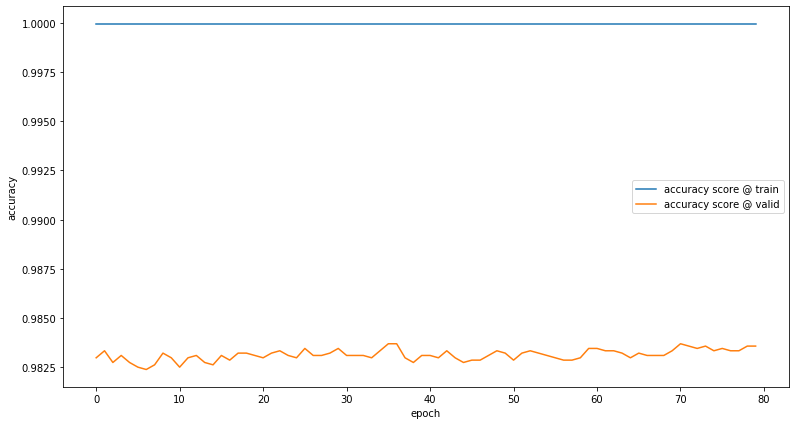

In [125]:
plt.figure(figsize=(13,7))
plt.plot(two_layers.history['acc'], label='accuracy score @ train')
plt.plot(two_layers.history['val_acc'], label='accuracy score @ valid')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss: 4.8518e-04 - acc: 1.0000 - val_loss: 0.1157 - val_acc: 0.9821

### submit to kaggle

In [21]:
x_test = test_dataset / 255
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [23]:
np.savetxt('submission.csv', out, header='ImageId,Label', comments='', fmt="%d,%d")

In [25]:
!kaggle competitions submit -c digit-recognizer -m "2 layers not tuned" -f submission.csv

Successfully submitted to Digit Recognizer



  0%|          | 0.00/235k [00:00<?, ?B/s]
  3%|3         | 8.00k/235k [00:00<00:18, 12.3kB/s]
 41%|####      | 96.0k/235k [00:01<00:08, 17.1kB/s]
 48%|####7     | 112k/235k [00:01<00:05, 23.2kB/s] 
 65%|######4   | 152k/235k [00:01<00:02, 32.3kB/s]
 78%|#######8  | 184k/235k [00:01<00:01, 44.2kB/s]
 99%|#########8| 232k/235k [00:01<00:00, 60.6kB/s]
100%|##########| 235k/235k [00:07<00:00, 30.6kB/s]


Your submission scored 0.97971, which is an improvement of your previous score of 0.97814. Great job!